# Test machine learning models for predicting median snowline elevations using terrain parameters

In [ ]:
#Helpful links!

#https://scikit-learn.org/stable/tutorial/index.html
#https://scikit-learn.org/stable/tutorial/basic/tutorial.html

#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html #sphx-glr-auto-examples-classification-plot-classifier-comparison-py

#https://medium.com/analytics-vidhya/how-to-use-google-colab-with-github-via-google-drive-68efb23a42d

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import os

In [2]:
!pip install geopandas #Installation format for packages not included with Google Colab.

In [ ]:
# May be interesting to install sliderule package, may need a specific environment though.

In [3]:
# If using Google Colab, mount Google Drive so you can access the files in this folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Uncomment the line below to locate the snow-cover-mapping-application folder in your Drive using os.listdir()
# os.listdir('drive/MyDrive/Research/PhD/snow_cover_mapping/snow_cover_mapping_application/snow-cover-mapping-application/')

In [10]:
# Load training data

#ALEXANDRA'S PATH TO DATA
path_to_folder = ('drive/MyDrive/snow_cover_mapping_application/snow-cover-mapping-application/')

# RAINEY'S PATH TO DATA
#path_to_folder = 'drive/MyDrive/Research/PhD/snow_cover_mapping/snow_cover_mapping_application/snow-cover-mapping-application/'

fn = 'training_data.csv' # file name
df = pd.read_csv(path_to_folder + fn)
#df.drop('Unnamed: 0', axis=1, inplace=True) # there's a weird "Unnamed" column I need to get rid of
df

,Unnamed: 0,study_site,datetime,snowlines_elevs_median_m,SCA_m2,AAR,O1Region,O2Region,Area,Zmin,Zmax,Zmed,Slope,Aspect
0,0,Wolverine,2013-09-15 15:10:00,1217.377579,9.281700e+06,0.602324,1,4,16.749,426,1636,1267,11.0,188
1,1,Wolverine,2015-08-04 15:07:39,1130.237648,1.123560e+07,0.728695,1,4,16.749,426,1636,1267,11.0,188
2,2,Wolverine,2016-08-31 15:02:02,1128.165947,1.112130e+07,0.721450,1,4,16.749,426,1636,1267,11.0,188
3,3,Wolverine,2017-09-29 15:15:10,1234.305453,7.414300e+06,0.969114,1,4,16.749,426,1636,1267,11.0,188
4,4,Wolverine,2018-09-13 15:07:39,1259.427673,8.747100e+06,0.592622,1,4,16.749,426,1636,1267,11.0,188
5,5,Wolverine,2019-08-25 15:18:35,1262.483019,2.764600e+06,0.366945,1,4,16.749,426,1636,1267,11.0,188
6,6,Wolverine,2020-08-12 15:28:33,1254.780865,9.115800e+06,0.632019,1,4,16.749,426,1636,1267,11.0,188
7,7,Wolverine,2021-09-11 15:28:44,1267.770837,9.125400e+06,0.592582,1,4,16.749,426,1636,1267,11.0,188
8,8,Wolverine,2022-08-02 15:28:48,1173.325647,2.418300e+06,0.364344,1,4,16.749,426,1636,1267,11.0,188
9,9,Gulkana,2015-09-21 15:07:13,1971.079590,1.526130e+07,0.984441,1,2,17.567,1162,2438,1858,14.0,172


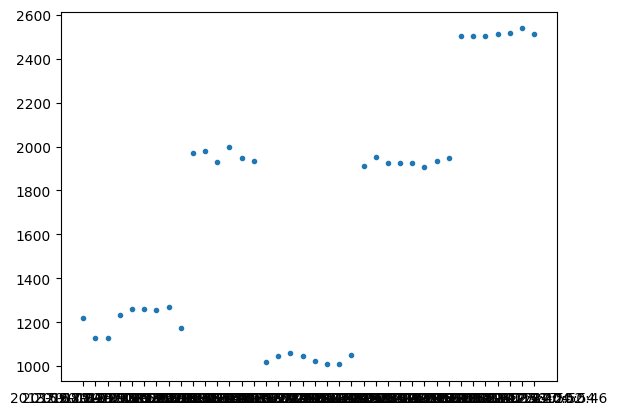

In [ ]:
plt.plot(df['datetime'], df['snowlines_elevs_median_m'], '.')
plt.show()

## Split training data into X (predictive features) and y (output labels)

In [8]:
# Define which columns to use as predictive "features" and which to use as outcome "labels"
# Feel free to adjust and play around with this
training_columns = ['Area','Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'snowlines_elevs_median_m'

# Separate features and labels
X = df[training_columns]
y = df[labels]

KeyError: ignored

## Define supervised machine learning models to test


Feel free to add more! See the [SciKitLearn Classifier comparison page](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) for more models, etc.

In [ ]:
# Define supervised machine learning models to test
# Adjust hyperparameters to see if it improves the model errors
# (see documentation for each model)

# Classifier names
names = [
  "Linear Regression",
    "Random Forest Regression",
    "Decision Tree Regression",
    "Support Vector Regression",
    "Gradient Boosting Regression",
    "Ridge Regression"


]

    #"Linear Regression",
   # "Random Forest Regression",
    #"Decision Tree Regression",
    #"Support Vector Regression",
    #"Gradient Boosting Regression",
    #"Ridge Regression"
    #"Nearest Neighbors"
    #"AdaBoost"
    #"Naive Bayes"
    #"Neural Net"
    #"Gaussian Process"
    #"Linear SVM"


# Classifiers
classifiers = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    SVR(),
    GradientBoostingRegressor(),
    Ridge()
]


In [ ]:
#Use the code block below this one, this one outputs the same results. Just kept this to save the structure and syntax haha.

# Initialize performance metrics
abs_err = np.zeros(len(names)) # absolute error [m]

# Iterate over classifiers
for i, name, clf in zip(np.arange(0, len(names)), names, classifiers):

    print(name)

    # Conduct K-Fold cross-validation
    num_folds = 10 #You can change this!
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=1)
    abs_err_folds = np.zeros(num_folds) # absolute error for all folds
    j=0 # fold counter
    # loop through fold indices
    for train_ix, test_ix in kfold.split(X):

        # split data into training and testing using kfold indices
        X_train, X_test = X.loc[train_ix], X.loc[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        # fit model to X_train and y_train
        clf.fit(X_train, y_train)

        # predict outputs for X_test values
        y_pred = clf.predict(X_test)

        # calculate performance metrics
        abs_err_folds[j] = np.nanmean(np.abs(y_test - y_pred))

    # take average performance metrics for all folds
    abs_err[i] = np.nanmean(abs_err_folds)

    # display performance results
    print('    Mean absolute error = '+str(np.round(abs_err[i]))+' m')

    #plt.show()


# Select best model using performance metrics


Linear Regression
    Mean absolute error = 3.0 m
Random Forest Regression
    Mean absolute error = 3.0 m
Decision Tree Regression
    Mean absolute error = 3.0 m
Support Vector Regression
    Mean absolute error = 47.0 m
Gradient Boosting Regression
    Mean absolute error = 3.0 m
Ridge Regression
    Mean absolute error = 3.0 m


In [ ]:
#Updated code block from above! Previous block had the same outputs for each field. Modified the for loop. (# Iterate over classifiers: for i, (name, clf) in enumerate(zip(names, classifiers))

#this code performs K-fold cross-validation for multiple classifiers, trains and evaluates the models on each fold, calculates the mean absolute error for each classifier, and displays the performance results.

#k fold will split the data set into equal(ish) parts, then it will be trained and evaluated a certain amount of times.

# Initialize performance metrics
abs_err = np.zeros(len(names)) # absolute error [m]

# Iterate over classifiers
for i, (name, clf) in enumerate(zip(names, classifiers)):
    print(name)

    # Conduct K-Fold cross-validation
    num_folds = 10
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=1)
    abs_err_folds = np.zeros(num_folds) # absolute error for all folds
    j = 0 # fold counter

    # loop through fold indices
    for train_ix, test_ix in kfold.split(X):
        # split data into training and testing using kfold indices
        X_train, X_test = X.loc[train_ix], X.loc[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        # fit model to X_train and y_train
        clf.fit(X_train, y_train)

        # predict outputs for X_test values
        y_pred = clf.predict(X_test)

        # calculate performance metrics
        abs_err_folds[j] = np.nanmean(np.abs(y_test - y_pred))
        j += 1

    # take average performance metrics for all folds
    abs_err[i] = np.nanmean(abs_err_folds)

    # display performance results
    print('    Mean absolute error = ' + str(np.round(abs_err[i])) + ' m')


Linear Regression
    Mean absolute error = 26.0 m
Random Forest Regression
    Mean absolute error = 25.0 m
Decision Tree Regression
    Mean absolute error = 26.0 m
Support Vector Regression
    Mean absolute error = 496.0 m
Gradient Boosting Regression
    Mean absolute error = 26.0 m
Ridge Regression
    Mean absolute error = 26.0 m


In [ ]:
#How this works:

#this code performs K-fold cross-validation for multiple classifiers, trains and evaluates the models on each fold, calculates the mean absolute error for each classifier, and displays the performance results.


#abs_err = np.zeros(len(names)): This line creates a NumPy array of zeros with the length equal to the number of classifiers. This array will store the mean absolute error for each classifier.


#for i, (name, clf) in enumerate(zip(names, classifiers)):: This loop iterates over the names and classifiers, which are provided in the names and classifiers variables. The enumerate function is used to get both the index (i) and the corresponding name and classifier.

#num_folds = 10: This line sets the number of folds to 10.
#kfold = KFold(n_splits=num_folds, shuffle=True, random_state=1): This line creates an instance of the KFold class with the specified number of splits, enabling shuffling of the data, and setting a random state for reproducibility.
#abs_err_folds = np.zeros(num_folds): This line creates a NumPy array of zeros with the length equal to the number of folds. This array will store the mean absolute error for each fold.
#j = 0: This line initializes a counter variable j to keep track of the fold number.


#for train_ix, test_ix in kfold.split(X):: This loop iterates over the indices generated by the KFold split on the feature data X. The train_ix and test_ix contain the indices for the training and testing data for each fold, respectively.
#X_train, X_test = X.loc[train_ix], X.loc[test_ix]: This line splits the feature data X into training and testing sets based on the fold indices.
#y_train, y_test = y[train_ix], y[test_ix]: This line splits the target variable y into training and testing sets based on the fold indices.
#Fitting the model and predicting:

#clf.fit(X_train, y_train): This line fits (trains) the classifier model (clf) using the training data.
#y_pred = clf.predict(X_test): This line predicts the outputs for the testing data (X_test) using the trained model.

#abs_err_folds[j] = np.nanmean(np.abs(y_test - y_pred)): This line calculates the mean absolute error for the current fold by taking the absolute difference between the true target values (y_test) and the predicted values (y_pred), and then computing the mean. The result is stored in the abs_err_folds array for the corresponding fold.
#j += 1: This line increments the fold counter.

#abs_err[i] = np.nanmean(abs_err_folds): This line computes the mean of the absolute errors across all folds and assigns it to the abs_err array at the corresponding index (i).




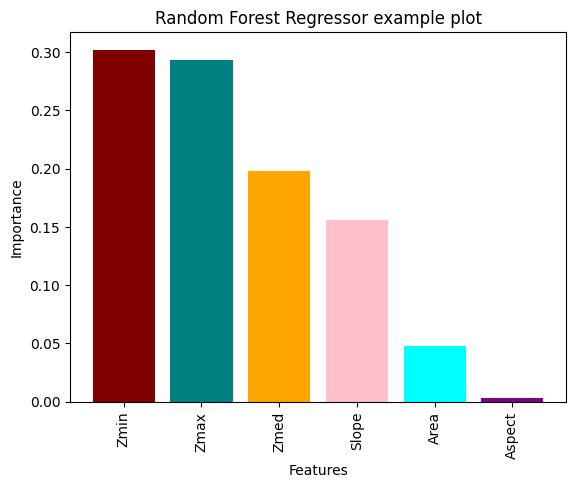

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

fn = 'training_data.csv'  # file name
df = pd.read_csv(path_to_folder + fn)
df.drop('Unnamed: 0', axis=1, inplace=True)

training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'snowlines_elevs_median_m'

X = df[training_columns]
y = df[labels]

clf = RandomForestRegressor()
clf.fit(X, y)

feature_importances = clf.feature_importances_

sorted_indices = sorted(range(len(feature_importances)), key=lambda i: feature_importances[i], reverse=True)
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [training_columns[i] for i in sorted_indices]

plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, color=['maroon', 'teal', 'orange', 'pink', 'cyan', 'purple'])
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation='vertical')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Regressor example plot')

plt.show()


In [ ]:
#How this works:

#Splitting the data into features and target variable:

#X = df[training_columns]:  selects the columns specified in training_columns from the DataFrame df and assigns them to the variable X, which represents the features.
#y = df[labels]: selects the column specified in labels from the DataFrame df and assigns it to the variable y, which represents the target variable.

#clf = RandomForestRegressor():  creates an instance of the RandomForestRegressor class with default parameters.
#clf.fit(X, y): fits (trains) the RandomForestRegressor model using the features X and the target variable y.

#feature_importances = clf.feature_importances_: retrieves the feature importances from the trained model and assigns them to the variable feature_importances.

#sorted_indices = sorted(range(len(feature_importances)), key=lambda i: feature_importances[i], reverse=True): generates a list of indices that would sort the feature importances in descending order.

#sorted_feature_importances = [feature_importances[i] for i in sorted_indices]:  creates a new list of feature importances sorted according to the indices obtained in the previous step.
#sorted_feature_names = [training_columns[i] for i in sorted_indices]: creates a new list of feature names sorted according to the indices obtained in the previous step.

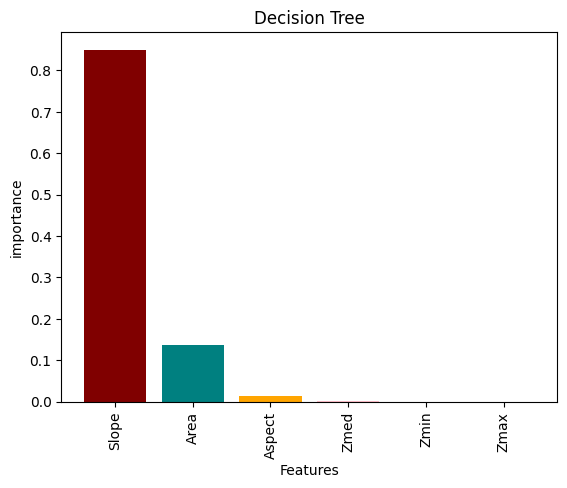

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

fn = 'training_data.csv'
#df = pd.read_csv(path_to_folder + fn)
#df.drop('Unnamed: 0', axis=1, inplace=True)

training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'snowlines_elevs_median_m'

X = df[training_columns]
y = df[labels]

clf = DecisionTreeRegressor()
clf.fit(X, y)

feature_importances = clf.feature_importances_

sorted_indices = sorted(range(len(feature_importances)), key=lambda i: feature_importances[i], reverse=True)
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [training_columns[i] for i in sorted_indices]

plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, color=['maroon', 'teal', 'orange', 'pink', 'cyan', 'purple'])
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation='vertical')


plt.xlabel('Features')
plt.ylabel('importance')
plt.title('Decision Tree')

plt.show()




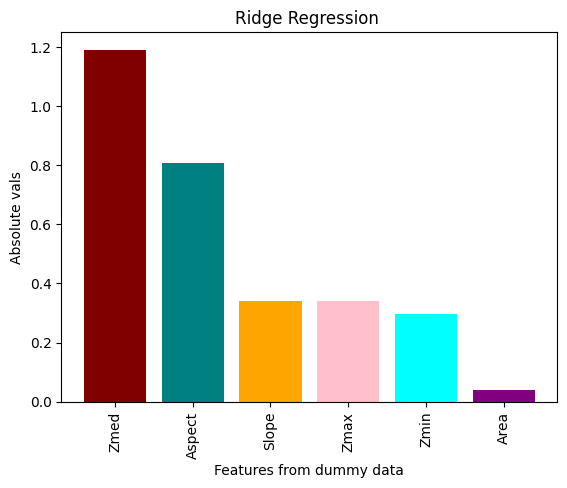

In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt

fn = 'training_data.csv'
#df = pd.read_csv(path_to_folder + fn)
#df.drop('Unnamed: 0', axis=1, inplace=True)

training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'snowlines_elevs_median_m'

X = df[training_columns]
y = df[labels]

clf = Ridge()
clf.fit(X, y)

coefficients = np.abs(clf.coef_)

sorted_indices = np.argsort(coefficients)[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = np.array(training_columns)[sorted_indices]

plt.bar(range(len(sorted_coefficients)), sorted_coefficients, color=['maroon', 'teal', 'orange', 'pink', 'cyan', 'purple'])
plt.xticks(range(len(sorted_coefficients)), sorted_feature_names, rotation='vertical')

plt.xlabel('Features from dummy data')
plt.ylabel('Absolute vals')
plt.title('Ridge Regression ')

plt.show()



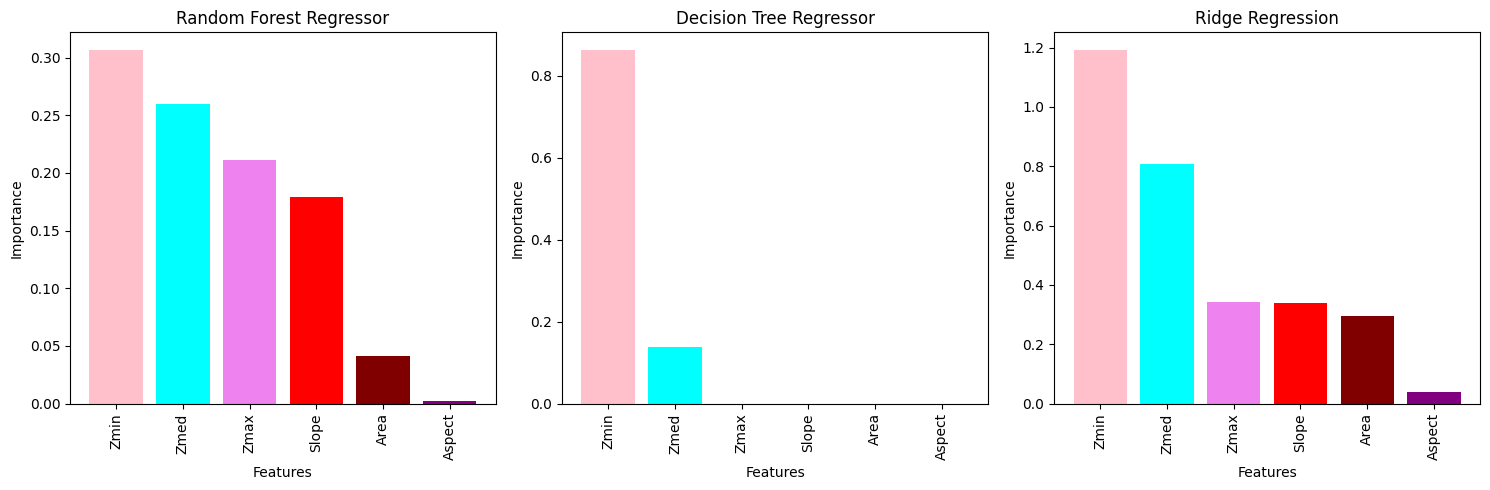

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

fn = 'training_data.csv'
#df = pd.read_csv(fn)
#df.drop('Unnamed: 0', axis=1, inplace=True)

training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'snowlines_elevs_median_m'
X = df[training_columns]
y = df[labels]

random_forest = RandomForestRegressor()
decision_tree = DecisionTreeRegressor()
ridge_regression = Ridge()

random_forest.fit(X, y)
decision_tree.fit(X, y)
ridge_regression.fit(X, y)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

colors = {
    'Area': 'maroon',
    'Zmin': 'pink',
    'Zmax': 'violet',
    'Zmed': 'cyan',
    'Slope': 'red',
    'Aspect': 'purple'
}

rf_feature_importances = random_forest.feature_importances_
dt_feature_importances = decision_tree.feature_importances_
ridge_feature_importances = np.abs(ridge_regression.coef_)

sorted_rf_indices = np.argsort(rf_feature_importances)[::-1]
sorted_dt_indices = np.argsort(dt_feature_importances)[::-1]
sorted_ridge_indices = np.argsort(ridge_feature_importances)[::-1]

sorted_rf_feature_importances = rf_feature_importances[sorted_rf_indices]
sorted_dt_feature_importances = dt_feature_importances[sorted_dt_indices]
sorted_ridge_feature_importances = ridge_feature_importances[sorted_ridge_indices]

sorted_training_columns = np.array(training_columns)[sorted_rf_indices]

axs[0].bar(range(len(sorted_rf_feature_importances)), sorted_rf_feature_importances, color=[colors[column] for column in sorted_training_columns])
axs[0].set_xticks(range(len(sorted_rf_feature_importances)))
axs[0].set_xticklabels(sorted_training_columns, rotation='vertical')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Importance')
axs[0].set_title('Random Forest Regressor')

axs[1].bar(range(len(sorted_dt_feature_importances)), sorted_dt_feature_importances, color=[colors[column] for column in sorted_training_columns])
axs[1].set_xticks(range(len(sorted_dt_feature_importances)))
axs[1].set_xticklabels(sorted_training_columns, rotation='vertical')
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Importance')
axs[1].set_title('Decision Tree Regressor')

axs[2].bar(range(len(sorted_ridge_feature_importances)), sorted_ridge_feature_importances, color=[colors[column] for column in sorted_training_columns])
axs[2].set_xticks(range(len(sorted_ridge_feature_importances)))
axs[2].set_xticklabels(sorted_training_columns, rotation='vertical')
axs[2].set_xlabel('Features')
axs[2].set_ylabel('Importance')
axs[2].set_title('Ridge Regression')

plt.tight_layout()
plt.show()



In [ ]:
#the feature importances are sorted in descending order using np.argsort() with the [::-1] indexing to reverse the order.

In [ ]:
#Make sure that it sorts the name of the variables correctly. Assign colors to each feature in the data set, not just random ones.

#note to self: 2nd subplot is different than figure plotted above, need to fix. (Decision tree)

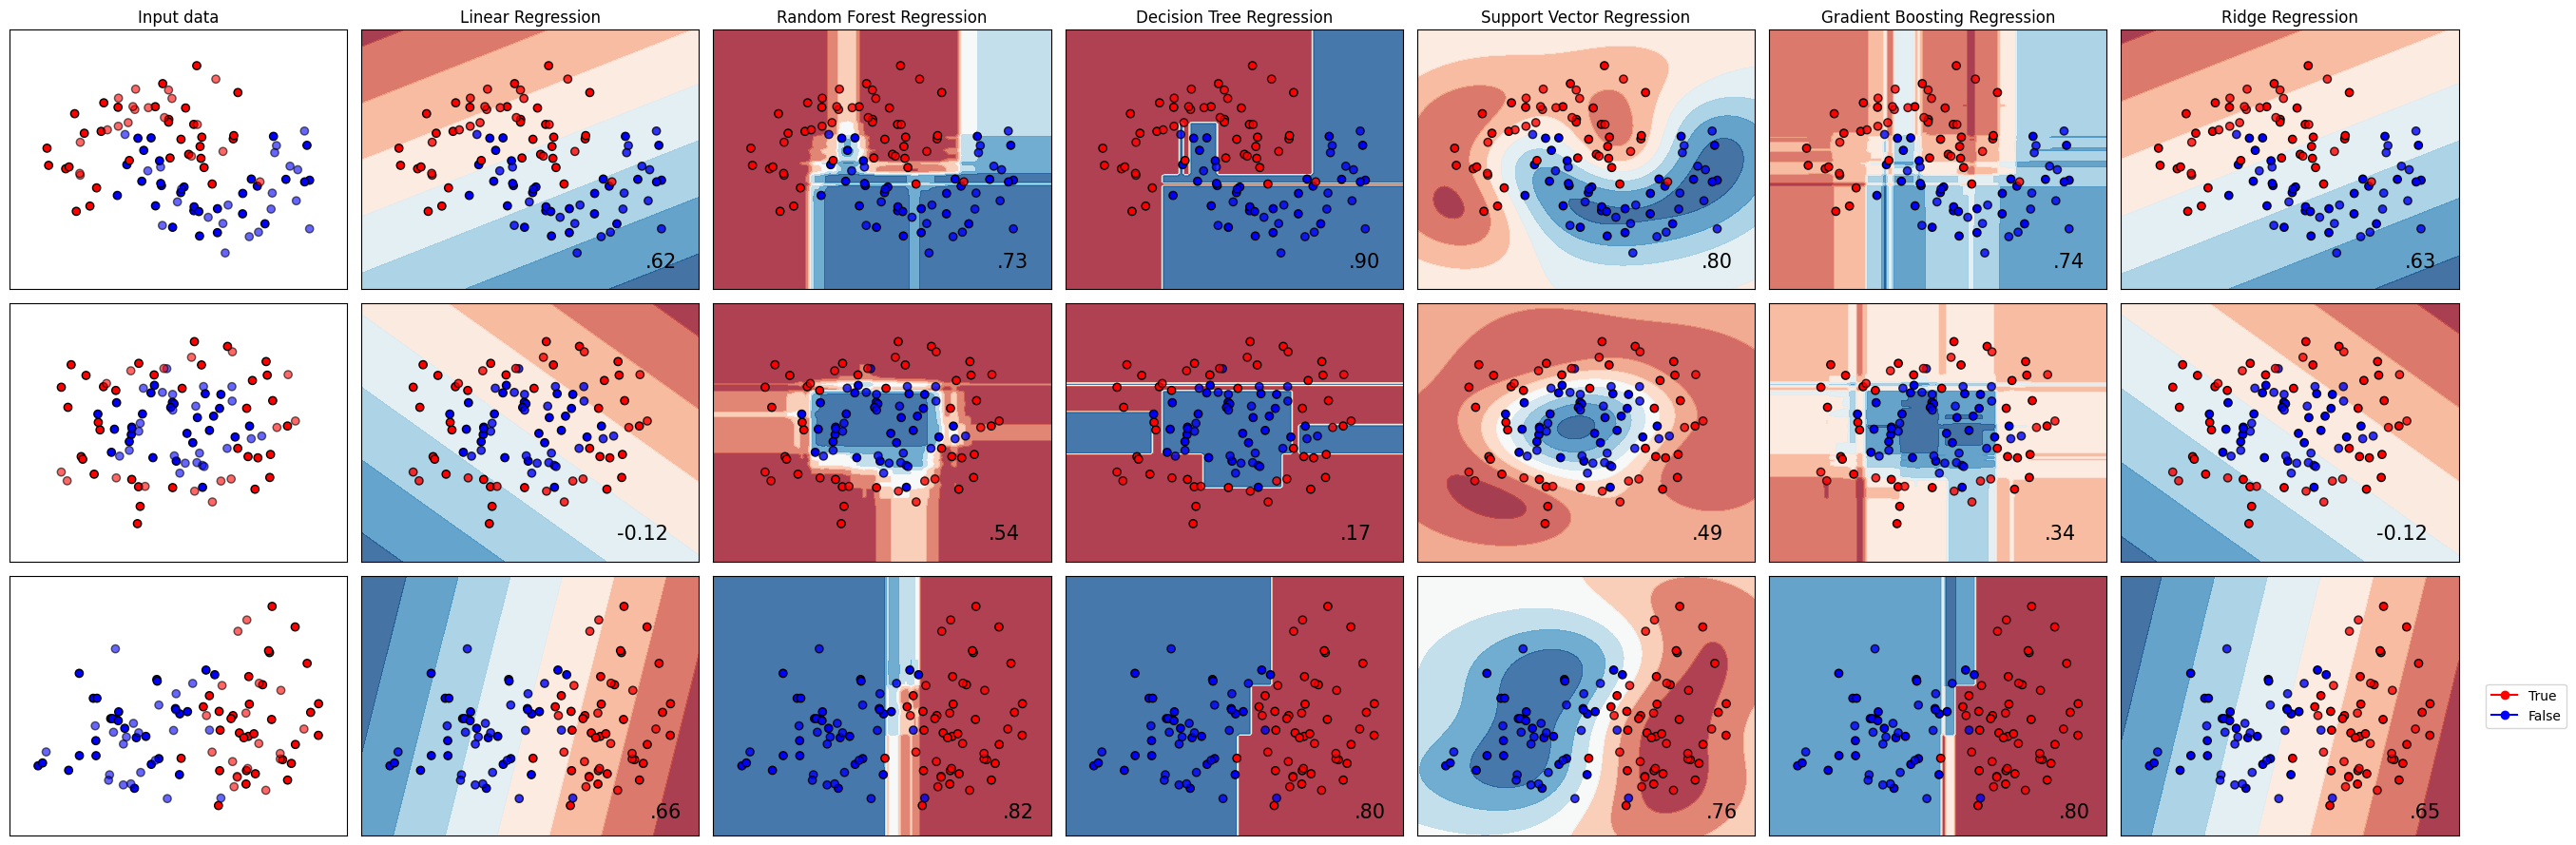

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd

fn = 'training_data.csv'  # file name
path_to_folder = './'  # path to folder containing the CSV file

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # plot data

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")

    # Plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

    # Plot testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.8,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

legend_colors = ["r", "b"]
legend_labels = ["True", "False"]
handles = [plt.Line2D([], [], marker='o', color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=handles, loc="center", bbox_to_anchor=(1.2, 0.5))


plt.tight_layout()
plt.show()


In [ ]:

#Next steps:

#mess with colors, for funsies

#Plot which one is best

#ROC curve & area under the curve

#label true (what color = true)

In [ ]:
# Only plot one at a time:





model 1 accuracy score: 0.74685
model 2 accuracy score: 0.7522
model 1 AUC score: 0.77054461
model 2 AUC score: 0.86177699


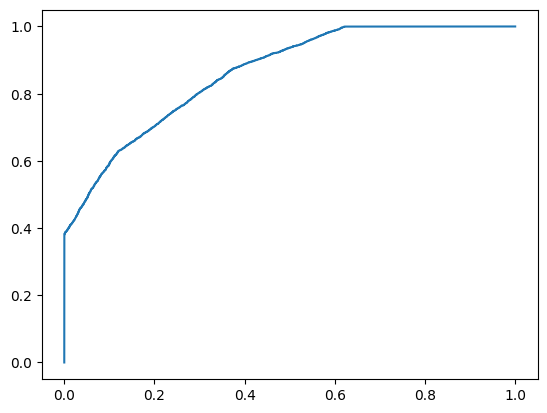

In [ ]:
#Example ROC curve code:
import numpy as np

n = 10000
y = np.array([0] * n + [1] * n)

y_prob_1 = np.array(
    np.random.uniform(.25, .5, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.5, .75, n//2).tolist()
)
y_prob_2 = np.array(
    np.random.uniform(0, .4, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.6, 1, n//2).tolist()
)

print(f'model 1 accuracy score: {accuracy_score(y, y_prob_1>.5)}')
print(f'model 2 accuracy score: {accuracy_score(y, y_prob_2>.5)}')

print(f'model 1 AUC score: {roc_auc_score(y, y_prob_1)}')
print(f'model 2 AUC score: {roc_auc_score(y, y_prob_2)}')

#plot_roc_curve(y, y_prob_1)

fpr, tpr, thresholds = roc_curve(y, y_prob_2)
plt.plot(fpr, tpr)

#ROC accuracy score -> How accurate the model is. Values closer to 1 are good models. (1 = perfectly distinguish pos and neg class points)
#May need probability scores before coding this up.

In [ ]:
#ROC curve  using dummy data: (receiver operating characteristic curve)
#This is a graph showing the performance of a classification model at all classification thresholds.

import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fn = 'training_data.csv'

training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'snowlines_elevs_median_m'

X = df[training_columns]
y = df[labels]

clf = Ridge()
clf.fit(X, y)
y_scores = clf.predict(X)

fpr, tpr, _ = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='orange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()






ValueError: ignored